Numbers from images

Video-tutorial in the Youtube channel BioPrograma https://www.youtube.com/channel/UCbJAU7N9FYvwkdgSwD_1S4Q

In [ ]:
#!pip install scikit-image
#!pip install matplotlib
#!pip install numpy
#!pip install pandas

In [33]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from skimage.measure import regionprops_table
from skimage.io import imread, imshow 
import pandas as pd
import os

In [24]:
os.chdir('/Users/bruni/OneDrive/Documents/BioPrograma/0004_extracao_de_numeros_a_partir_de_imagens/')

In [30]:
#load image file and label image
image = imread('test_images/test_1.tiff')
label_image =  imread('label_images/label_test_1.tiff')


In [26]:
image.shape

(1040, 1392, 3)

In [31]:
label_image.shape

(1040, 1392)

In [27]:
nucleo_ch = image[:,:,0]
target_ch = image[:,:,1]

In [42]:
#Function random_map by Guilhaume Witz to make a random cmap to label colors. No need to change anything here. You may save this function as random_cmap.py and call it if n
#https://github.com/guiwitz/neubias_academy_biapy/blob/master/16-Experiment_analysis.ipynb
#BSD 3-Clause License Copyright (c) 2021, University of Bern, Mathematical Institute and Microscopy Imaging Center, Guillaume Witz
def random_cmap():
    np.random.seed(42)
    cmap = matplotlib.colors.ListedColormap (np.random.rand(256,4))
    # value 0 should just be transparent
    cmap.colors[:,3] = 0.5
    cmap.colors[0,:] = 1
    cmap.colors[0,3] = 0


    # if image is a mask, color (last value) should be red
    cmap.colors[-1,0] = 1
    cmap.colors[-1,1:3] = 0
    return cmap


cmap = random_cmap()  

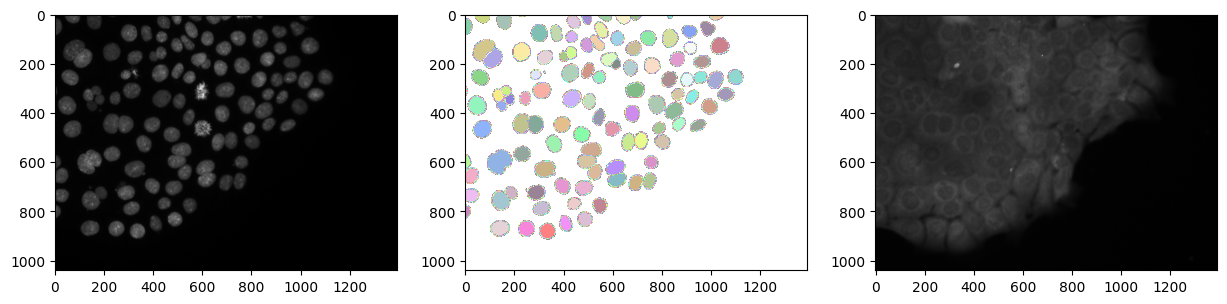

In [47]:
figs, axs = plt.subplots(1,3, figsize=(15,15))
axs[0].imshow(nucleo_ch , cmap='gray')
axs[1].imshow(label_image, cmap= cmap)
axs[2].imshow(target_ch, cmap='gray')

In [56]:
# For more properties to be measures, go to https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops
properties = 'label', 'area', 'eccentricity', 'mean_intensity'
data = regionprops_table(label_image, intensity_image=target_ch, properties= properties)

In [57]:
#Making a pandas data frame
df= pd.DataFrame(data)

In [58]:
df

,label,area,eccentricity,mean_intensity
0,1,2005,0.789034,144.015960
1,2,3302,0.349732,125.600545
2,3,403,0.951780,145.774194
3,4,1429,0.550421,193.060882
4,5,1266,0.858359,181.283570
...,...,...,...,...
105,106,2758,0.295760,189.277375
106,107,2501,0.707040,167.660936
107,108,3760,0.577380,142.117021
108,109,3234,0.293643,178.187693


In [64]:
#saving dataframe as csv. Can be read in excel and other programs
pd.DataFrame.to_csv(df,'results.csv')